# Introduction to Visualzing Data with Matplotlib

## Learning Goals

1. Tour of plotting with the python package Matplotlib.
2. Pyplot API vs Object Oriented approach.

By the end of this lesson you should be able to:

1. Run a Jupyter Notebook.
    + Import packages.
    + Use Markdown for text and math.
2. Create and save simple plots using matplotlib.
    + Line plots
    + Scatter plots
    + Histograms
3. Write and plot your own functions.

## Learning Activities

1. Working knowledge of numpy.
1. Install Jupyter Notebook and associated packages.
2. Tour of the Pyplot API.
3. Tour of the Object Oriented approach.

### Prepare Notebook

In [1]:
# Import scientific python number handling.
import numpy as np

# Import pyplot plt for convenience.
import matplotlib.pyplot as plt

# Import matplotlib into the notebooks namespace.
import matplotlib

In [2]:
# Use jupyter notebooks inline function to simplify plot display.
%matplotlib inline

#### Pyplot API

This API is good for simple applications. For more interesting
work we need to use the object oriented approach.

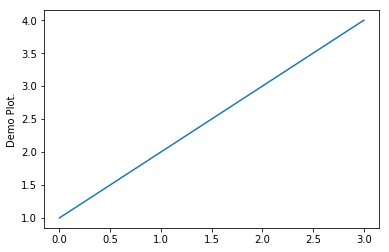

In [3]:
plt.plot([1,2,3,4])
plt.ylabel('Demo Plot.')
plt.show()

## Define a function

### Boltzmann Probability Distribution

You have surely seen this before. Let us import our Python
packages and plot it to get ready.

$$
P(\alpha) = e^{\frac{-E(\alpha)}{kT}}
$$

In [5]:
def calc_Boltz_Dist_Prob(energy, temperature, k=1.0):
    """Returns the probability of a given energy. This function
    defaults to a unitless output."""
    return np.exp(-energy / (k * temperature))

In [6]:
# Create ranges of temperature and energy.
temp_range = np.arange(0.1, 100)
energy_range = np.arange(0.1, 100)

## Plot the function

Since this function has two variables let us keep one of them constant.

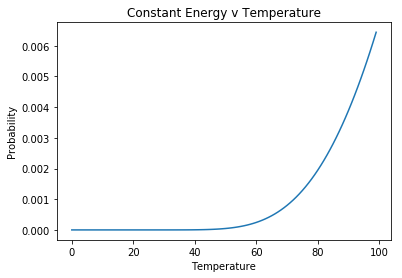

In [7]:
plt.plot(calc_Boltz_Dist_Prob(500, temp_range))
plt.title('Constant Energy v Temperature')
plt.ylabel('Probability')
plt.xlabel('Temperature')
plt.show()

## Exponential decay function
The reaction we are modeling is one species decaying into another:

$$ A \xrightarrow{c} B $$

$A$ is the starting material, and $B$ is the decay product. $c$ is the rate constant, in whatever units of time we would like.

The reason we do this is this system is simple enough that it can be solved exactly, and we can check our work. The simple equations that turn out to model exponential decay are:

$$X(t) = X_0e^{-ct}$$

In python:

In [8]:
def exponential_decay(X, c, t):
    # np.exp is e raised to the arguments within ()
    return X * np.exp(-c * t)

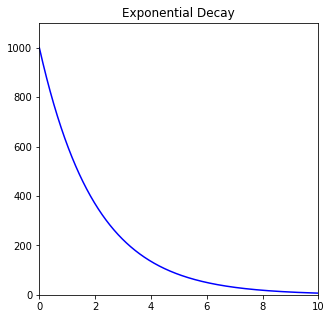

In [9]:
# first we need a time range for the plot.
# np.linspace(a,b,c) creates a range from a to b, with c points in it.
time_range = np.linspace(0, 10, 1000)

# assing an alias to the exponential decay function.
exp = exponential_decay(1000, 0.5, time_range)

# declare the figure number and size
plt.figure(1, figsize=(5,5))

# set the x axis limit, this is our time axis.
# time_range[-1] returns the last value in the time_range line space.
plt.xlim(0, time_range[-1])

# set the y axix limit, this is our decaying species # axis
plt.ylim(0, 1100)

# set the title.
plt.title("Exponential Decay")

# ceate a plot, other Python implementations may require plt.show() as well.
plt.plot(time_range, exp, 'b', linewidth=1.5)

# plt.savefig('exp_decay.svg')
plt.show()

### Scatter Plot Demo

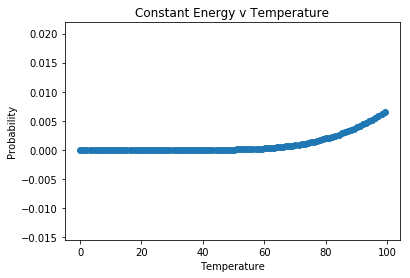

In [10]:
plt.scatter(temp_range, calc_Boltz_Dist_Prob(500, temp_range))
plt.title('Constant Energy v Temperature')
plt.ylabel('Probability')
plt.xlabel('Temperature')
plt.show()

## Adding dimensions

In [12]:
# Create ranges of temperature and energy.
temp_range = np.arange(0.1, 100)
energy_range = np.arange(0.1, 100)

# Create a mesh grid of these points so that we can
# visualize this function in three dimensions.
temp_mesh, energy_mesh = np.meshgrid(temp_range, energy_range)

# Calculate the Boltzmann Mesh
boltz_mesh = calc_Boltz_Dist_Prob(temp_mesh, energy_mesh)

### Plot the Boltzmann Distribution

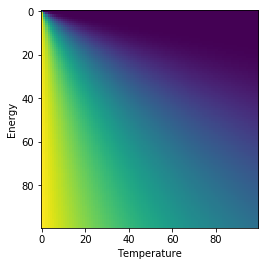

In [13]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Temperature')
ax.set_ylabel('Energy')
plt.imshow(boltz_mesh, interpolation='nearest')
plt.show()

In [14]:
# import a 3d axis toolkit.
from mpl_toolkits.mplot3d import Axes3D

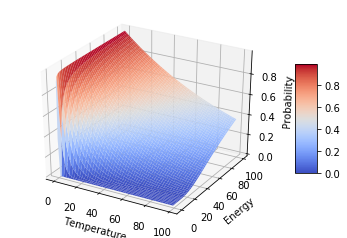

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(
    temp_mesh, 
    energy_mesh, 
    boltz_mesh,
    cmap=matplotlib.cm.coolwarm,
)

ax.set_xlabel('Temperature')
ax.set_ylabel('Energy')
ax.set_zlabel('Probability')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

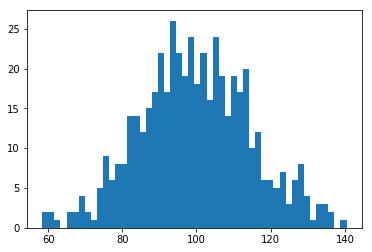

In [19]:
np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(500)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)